In [1]:
import pandas as pd
import numpy as np
import mofr #my own package for model evaluation
import pickle


from xgboost import XGBClassifier
from xgboost import plot_tree, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve


from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# Loading data

In [2]:
df=pd.read_csv(r'c:\Users\hp\Documents\Data_science\Repos\Revolut_assignment\Solution_for_export\data\processed_dataset_for_modelling.csv').reset_index(drop=True)
del df['Unnamed: 0']
df.head()

,USER_ID,ACCOUNT_CREATED_DATE,COUNTRY,BIRTH_DATE,TARGET,AGE,AGE_rounded,ID,CREATED_DATE,TYPE,...,TOPUP_NS_DAY_NO,TOPUP_NS_SUM,TOPUP_NS_DAY_SUM,TOPUP_S_NO,TOPUP_S_DAY_NO,TOPUP_S_SUM,TOPUP_S_DAY_SUM,BALANCE,CURRENCIES,COUNTRY_numeric
0,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,9499c9c9-c9a9-410f-820d-c6e92fed27fb,2019-04-11 20:53:54.7,TOPUP,...,0,0.0,0.0,1,1,0.01,0.01,0.00,1,0
1,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,b310db00-490f-4185-b247-c59f5694dd67,2019-04-11 20:54:02.156,TOPUP,...,0,0.0,0.0,2,2,8.93,8.93,8.92,1,0
2,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,e6021128-f4c1-4164-b3de-697e66ad613c,2019-04-11 20:55:20.996,FEE,...,0,0.0,0.0,2,2,8.93,8.93,3.58,1,0
3,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,a9aa681d-451e-44c5-8df0-687661ac583d,2019-04-19 21:05:53.192,TOPUP,...,0,0.0,0.0,3,1,124.77,115.84,119.42,1,0
4,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,1be7d138-fbaf-4216-8dc8-5056ec5f972c,2019-04-21 10:14:53.814,CARD_PAYMENT,...,0,0.0,0.0,3,0,124.77,0.00,74.98,1,0


In [3]:
df['ONE']=1

# Preparing train and test

In [4]:
target_column='TARGET'
predictor_columns=[
    'AGE',
    'COUNTRY_numeric',
    'CURRENCIES',
    'BALANCE',
    
    
    
       'TOPUP_ONE', 'CP_ONE',
       'FEE_ONE', 'EXCHANGE_ONE', 'TRANSFER_ONE', 'ATM_ONE', 'COMPLETED_ONE',
       'REVERTED_ONE', 'FAILED_ONE', 'DECLINED_ONE', 'MONEY_IN_ONE',
       'MONEY_OUT_ONE', 'TOPUP_NS_ONE', 'TOPUP_S_ONE', 
    
       'TRANSACTION_NO',
       'TRANSACTION_DAY_NO', 'TRANSACTION_SUM', 'TRANSACTION_DAY_SUM',
       'TOPUP_NO', 'TOPUP_DAY_NO', 'TOPUP_SUM', 'TOPUP_DAY_SUM', 'CP_NO',
       'CP_DAY_NO', 'CP_SUM', 'CP_DAY_SUM', 'FEE_NO', 'FEE_DAY_NO', 'FEE_SUM',
       'FEE_DAY_SUM', 'EXCHANGE_NO', 'EXCHANGE_DAY_NO', 'EXCHANGE_SUM',
       'EXCHANGE_DAY_SUM', 'TRANSFER_NO', 'TRANSFER_DAY_NO', 'TRANSFER_SUM',
       'TRANSFER_DAY_SUM', 'ATM_NO', 'ATM_DAY_NO', 'ATM_SUM', 'ATM_DAY_SUM',
       'COMPLETED_NO', 'COMPLETED_DAY_NO', 'COMPLETED_SUM',
       'COMPLETED_DAY_SUM', 'REVERTED_NO', 'REVERTED_DAY_NO', 'REVERTED_SUM',
       'REVERTED_DAY_SUM', 'FAILED_NO', 'FAILED_DAY_NO', 'FAILED_SUM',
       'FAILED_DAY_SUM', 'DECLINED_NO', 'DECLINED_DAY_NO', 'DECLINED_SUM',
       'DECLINED_DAY_SUM', 'MONEY_IN_NO', 'MONEY_IN_DAY_NO', 'MONEY_IN_SUM',
       'MONEY_IN_DAY_SUM', 'MONEY_OUT_NO', 'MONEY_OUT_DAY_NO', 'MONEY_OUT_SUM',
       'MONEY_OUT_DAY_SUM', 'TOPUP_NS_NO', 'TOPUP_NS_DAY_NO', 'TOPUP_NS_SUM',
       'TOPUP_NS_DAY_SUM'
]

X=df
Y=df[target_column]

In [5]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# XGBoost model

In [6]:
# fit xgb_model all predictors
xgb_model = XGBClassifier(max_depth=3)
xgb_model.fit(X_train[predictor_columns], y_train)
print(xgb_model)

[20:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)


In [7]:
X_test['xgb_model']=xgb_model.predict_proba(X_test[predictor_columns])[:,1]
X_train['xgb_model']=xgb_model.predict_proba(X_train[predictor_columns])[:,1]
df['xgb_model']=xgb_model.predict_proba(df[predictor_columns])[:,1]

## Evaluating the model

In [8]:
# make predictions for test and train
y_pred_test = xgb_model.predict(X_test[predictor_columns])
y_pred_prob_test = xgb_model.predict_proba(X_test[predictor_columns])[:,1]
y_pred_train = xgb_model.predict(X_train[predictor_columns])
y_pred_prob_train = xgb_model.predict_proba(X_train[predictor_columns])[:,1]

In [9]:
from mofr import metrics 

print('The Lift on the train set is: '+ str(metrics.lift(y_train, y_pred_prob_train)))
print('The Lift on the test set is: '+ str(metrics.lift(y_test, y_pred_prob_test)))
print('\n')
print('The GINI on the train set is: '+ str(metrics.gini(y_train, y_pred_prob_train)))
print('The GINI on the test set is: '+ str(metrics.gini(y_test, y_pred_prob_test)))

The Lift on the train set is: 9.19714678224072
The Lift on the test set is: 9.215806556957231


The GINI on the train set is: 0.9520895340562694
The GINI on the test set is: 0.9522669023688364


### Lift curve

In [10]:
from mofr.basic_evaluators.LiftCurve import LiftCurveEvaluator

lce=LiftCurveEvaluator()

In [11]:
lce.d(X_test).t([(target_column,'ONE')]).s(['xgb_model'])

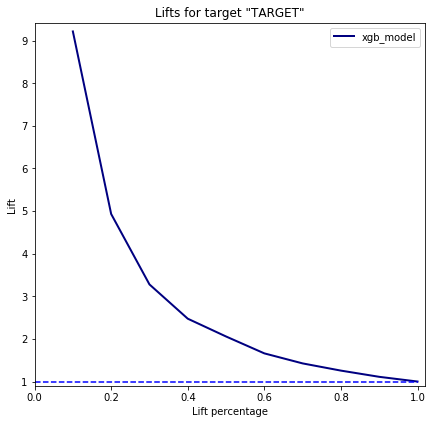

In [12]:
lce.get_graph()

### ROC curve

In [13]:
from mofr.basic_evaluators.ROCCurve import ROCCurveEvaluator

rce=ROCCurveEvaluator()

In [14]:
rce.d(X_test).d(X_test).t([(target_column,'ONE')]).s(['xgb_model'])

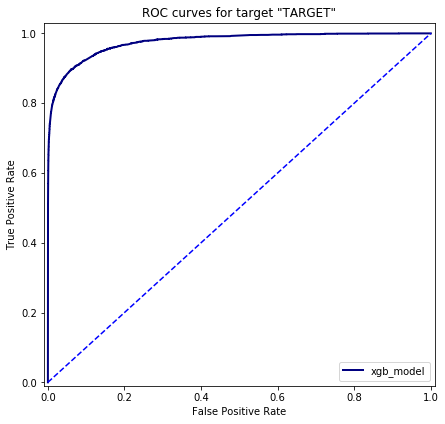

In [15]:
rce.get_graph()

### Feature importance

Text(0.5, 0, 'Xgboost Feature Importance')

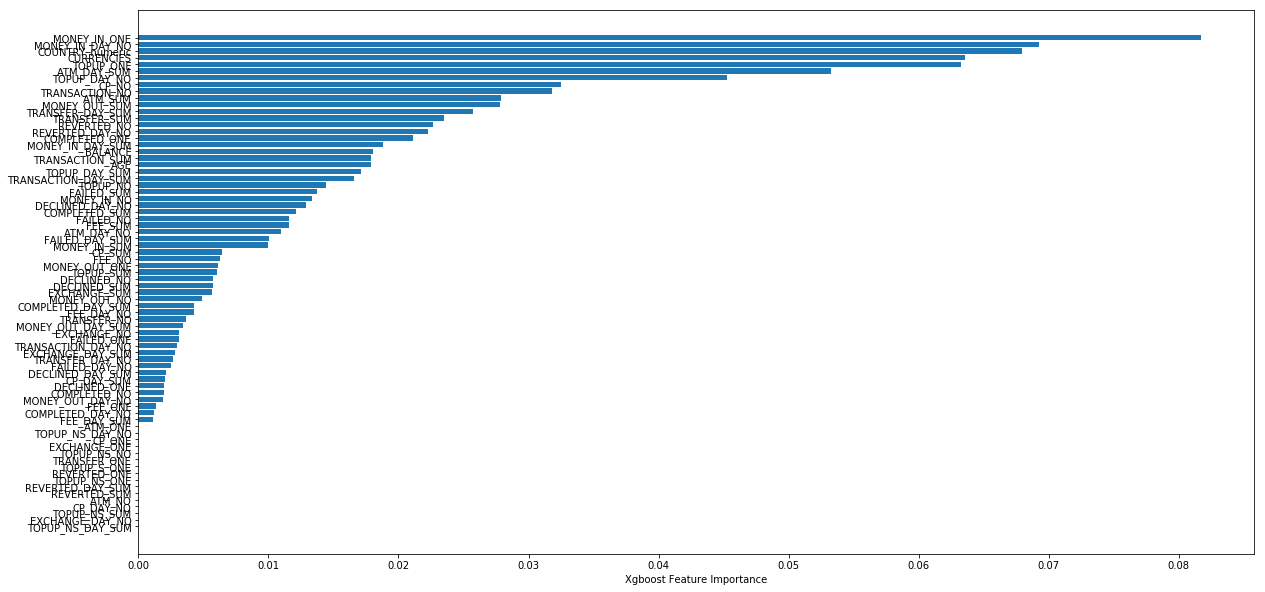

In [16]:
sorted_idx = xgb_model.feature_importances_.argsort()
order_=[]
for i in sorted_idx:
  order_.append(predictor_columns[i])

plt.figure(figsize=(20,10))

plt.barh(order_, xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [17]:
pd.DataFrame(order_[-1:1:-1], xgb_model.feature_importances_[sorted_idx][-1:1:-1]).head(30)

,0
0.081743,MONEY_IN_ONE
0.069284,MONEY_IN_DAY_NO
0.067975,COUNTRY_numeric
0.063533,CURRENCIES
0.063296,TOPUP_ONE
0.053228,ATM_DAY_SUM
0.045289,TOPUP_DAY_NO
0.032536,CP_NO
0.031803,TRANSACTION_NO
0.027895,ATM_SUM


# Logistic regression model

## Quick feature selection

In [18]:
result=[]
for pred in predictor_columns:
    
    gini=metrics.gini(df['TARGET'], df[pred])
    result.append((pred,gini, abs(gini)))
    #print(f'GINI= {gini} for {pred}')

In [19]:
#univariate gini of predictors
gini_preds=pd.DataFrame(result).sort_values(by=2, ascending=False)
gini_preds

,0,1,2
1,COUNTRY_numeric,0.543518,0.543518
25,TOPUP_DAY_SUM,0.528125,0.528125
23,TOPUP_DAY_NO,0.494002,0.494002
21,TRANSACTION_DAY_SUM,0.484730,0.484730
24,TOPUP_SUM,0.456244,0.456244
20,TRANSACTION_SUM,0.448678,0.448678
22,TOPUP_NO,0.425255,0.425255
19,TRANSACTION_DAY_NO,0.411110,0.411110
65,MONEY_IN_DAY_SUM,0.394263,0.394263
48,COMPLETED_SUM,0.375253,0.375253


In [20]:
#quick way of selecting features, 20 strongest univariately intersected with 30 strongest from XGBoost
pred_cols_lr=set(gini_preds[0][0:20]).intersection(list(pd.DataFrame(order_[-1:1:-1], xgb_model.feature_importances_[sorted_idx][-1:1:-1]).head(30)[0]))

In [21]:
pred_cols_lr

{'AGE',
 'COMPLETED_SUM',
 'COUNTRY_numeric',
 'FAILED_NO',
 'FAILED_SUM',
 'MONEY_IN_DAY_NO',
 'MONEY_IN_DAY_SUM',
 'MONEY_OUT_SUM',
 'TOPUP_DAY_NO',
 'TOPUP_DAY_SUM',
 'TOPUP_NO',
 'TRANSACTION_DAY_SUM',
 'TRANSACTION_SUM'}

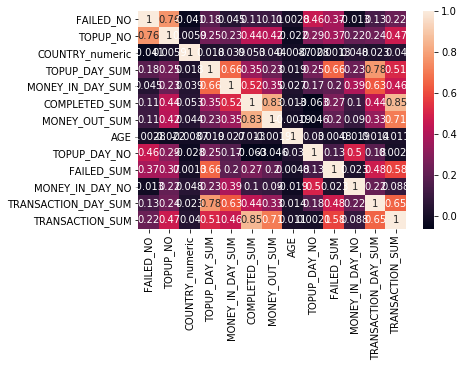

In [22]:
#correlation check
correlation_mat = df[pred_cols_lr].corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [23]:
pred_cols_lr_reduced={'AGE',
 #'COMPLETED_SUM',
 'COUNTRY_numeric',
 #'FAILED_NO',
 'FAILED_SUM',
 'MONEY_IN_DAY_NO',
 'MONEY_IN_DAY_SUM',
 'MONEY_OUT_SUM',
 'TOPUP_DAY_NO',
 'TOPUP_DAY_SUM',
 'TOPUP_NO',
 #'TRANSACTION_DAY_SUM',
 'TRANSACTION_SUM',
 'CURRENCIES'}

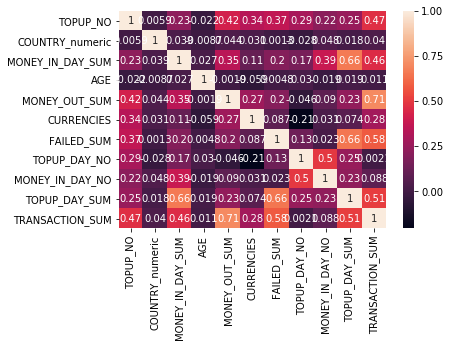

In [24]:
#correlation check
correlation_mat = df[pred_cols_lr_reduced].corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

## Building the model

In [25]:
# fit model all predictors
model  = LogisticRegression(solver='liblinear', random_state=seed)
model.fit(X_train[pred_cols_lr_reduced], y_train)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [26]:
model.coef_

array([[ 1.32708497e-01,  3.25984626e+00,  1.91897293e-03,
        -5.54522619e-02,  3.50824835e-03, -2.08963242e+00,
         1.32362462e-03,  1.17186373e-01,  5.11297325e-01,
         1.81344027e-04, -1.41248467e-03]])

In [27]:
full_model=LogisticRegression(solver='liblinear', random_state=seed)
full_model.fit(X_train[predictor_columns], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluating the model

In [28]:
X_test['lr_model']=model.predict_proba(X_test[pred_cols_lr_reduced])[:,1]
X_train['lr_model']=model.predict_proba(X_train[pred_cols_lr_reduced])[:,1]
df['lr_model']=model.predict_proba(df[pred_cols_lr_reduced])[:,1]

X_test['lr_full_model']=full_model.predict_proba(X_test[predictor_columns])[:,1]
X_train['lr_full_model']=full_model.predict_proba(X_train[predictor_columns])[:,1]
df['lr_full_model']=full_model.predict_proba(df[predictor_columns])[:,1]

In [29]:
# make predictions for test and train
y_pred_test = model.predict(X_test[pred_cols_lr_reduced])
y_pred_prob_test = model.predict_proba(X_test[pred_cols_lr_reduced])[:,1]
y_pred_train = model.predict(X_train[pred_cols_lr_reduced])
y_pred_prob_train = model.predict_proba(X_train[pred_cols_lr_reduced])[:,1]

In [30]:
from mofr import metrics 

print('The Lift on the train set is: '+ str(metrics.lift(y_train, y_pred_prob_train)))
print('The Lift on the test set is: '+ str(metrics.lift(y_test, y_pred_prob_test)))
print('\n')
print('The GINI on the train set is: '+ str(metrics.gini(y_train, y_pred_prob_train)))
print('The GINI on the test set is: '+ str(metrics.gini(y_test, y_pred_prob_test)))

The Lift on the train set is: 7.6147558155673964
The Lift on the test set is: 7.567470313062253


The GINI on the train set is: 0.8294989743320949
The GINI on the test set is: 0.8299095695203


### Lift curve

In [31]:
from mofr.basic_evaluators.LiftCurve import LiftCurveEvaluator

lce=LiftCurveEvaluator()

In [32]:
lce.d(X_test).t([(target_column,'ONE')]).s(['xgb_model', 'lr_model', 'lr_full_model'])

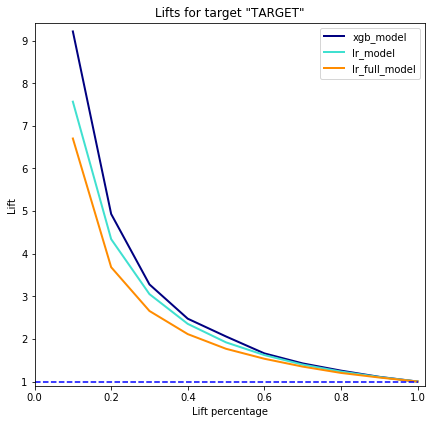

In [33]:
lce.get_graph()

### ROC curve

In [34]:
from mofr.basic_evaluators.ROCCurve import ROCCurveEvaluator

rce=ROCCurveEvaluator()

In [35]:
rce.d(X_test).d(X_test).t([(target_column,'ONE')]).s(['xgb_model','lr_model', 'lr_full_model'])

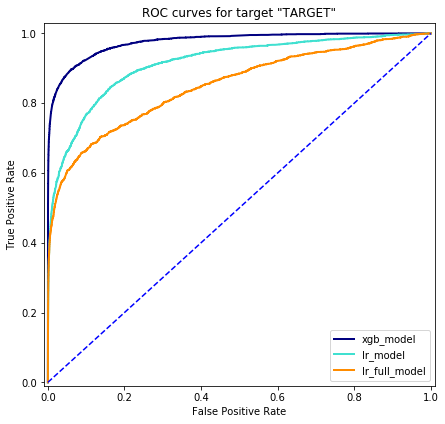

In [36]:
rce.get_graph()

# PICKING UP STRATEGY FOR LOCK_USER

## Precision-Recall Curve

In [37]:
#changing the dataset so that is based on usersto be on the level of individual users
df_new=df.groupby('USER_ID')[['xgb_model','lr_full_model','lr_model','TARGET','ONE']].max().reset_index()
df_new.head()

,USER_ID,xgb_model,lr_full_model,lr_model,TARGET,ONE
0,00001f33-1d47-47a3-8955-e719172e788b,0.000551,0.012959,0.001513,0.0,1
1,00005048-a584-4b94-a0fc-481c7bc916f1,0.002607,0.000196,0.007191,0.0,1
2,0000bc95-82c9-4c4b-a422-e807da1e9443,0.004647,0.012098,0.028137,0.0,1
3,0000e262-23b9-4764-82d1-1d4d07ac63b7,0.000851,0.000254,0.000695,0.0,1
4,0001319d-92c5-4c95-bfea-98c4e65c461b,0.019777,0.051512,0.045552,0.0,1


In [38]:
from mofr.basic_evaluators.PRCurve import PRCurveEvaluator

prce=PRCurveEvaluator()

In [39]:
prce.d(df_new).d(df_new).t([(target_column,'ONE')]).s(['lr_model', 'lr_full_model','xgb_model'])

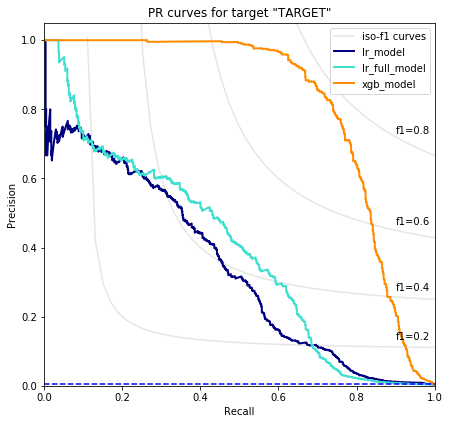

In [40]:
prce.get_graph(isocurves='on')

### XGBoost model is far better than Logistic regressions here (the same on X_test), 
# would still double check this performance on a completely independent data sample
# but would pick XGBoost model

## Choosing optimal threshold

In [41]:
# Here, the simple way would be to pick the threshold with highest f1 statistic
# However, we can also optimize some parametric cost structure like below (up to discussion of course, but had to choose some values)

reward_for_catching_fraud=10
penalty_for_locking_nofraud=2
penalty_for_notlocking_fraud=3

cost_of_locking_a_user=0.5

In [42]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(df_new['TARGET'], df_new['xgb_model'])

In [43]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.712919, F-Score=0.777


In [44]:
result=[]
for threshold in range(100):
    #print(threshold/100.0)
    threshold=threshold/100.0
    #print(threshold)
    cost=df_new[df_new['xgb_model']>threshold]['TARGET'].sum()*(reward_for_catching_fraud-cost_of_locking_a_user)-len(df_new[(df_new['xgb_model']>threshold)&(df['TARGET']==0)])*(penalty_for_locking_nofraud+cost_of_locking_a_user)\
    -df_new[df_new['xgb_model']<=threshold]['TARGET'].sum()*penalty_for_notlocking_fraud

    result.append((threshold, cost))

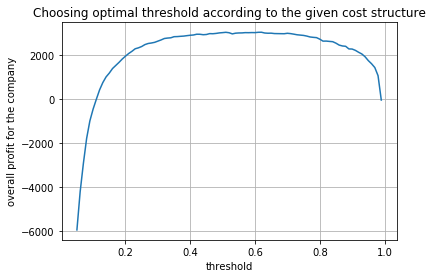

In [45]:
import matplotlib.pyplot as plt

# Data for plotting
t =pd.DataFrame(result)[0][5:]
s =pd.DataFrame(result)[1][5:]

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='threshold', ylabel='overall profit for the company',
       title='Choosing optimal threshold according to the given cost structure')
ax.grid()

plt.show()


In [46]:
pd.DataFrame(result).sort_values(by=1, ascending=False).head()

,0,1
62,0.62,3054.0
51,0.51,3051.5
61,0.61,3051.5
59,0.59,3039.0
57,0.57,3036.5


In [47]:
#Optimal threshold is 0.62, this will maximize the benefit for the company

In [48]:
precision=df_new[df_new['xgb_model']>0.62]['TARGET'].sum()/len(df_new[df_new['xgb_model']>0.62])
recall=df_new[df_new['xgb_model']>0.62]['TARGET'].sum()/len(df_new[df_new['TARGET']==1])

print(f'Precision at optimal threshold = {precision}')
print(f'Recall at optimal threshold = {recall}')

Precision at optimal threshold = 0.771505376344086
Recall at optimal threshold = 0.7582562747688243


# Exporting the model

In [49]:
import pickle
file_name = r"c:\Users\hp\Documents\Data_science\Repos\Revolut_assignment\Solution_for_export\artifacts\xgb_model.pkl"

In [50]:
# save
pickle.dump(xgb_model, open(file_name, "wb"))

#  Testing the Patrol class

In [51]:
df=pd.read_csv(r'c:\Users\hp\Documents\Data_science\Repos\Revolut_assignment\Solution_for_export\data\processed_dataset_for_modelling.csv').reset_index(drop=True).sample(1000)
del df['Unnamed: 0']

In [62]:
df[df['TARGET']==1]

,USER_ID,ACCOUNT_CREATED_DATE,COUNTRY,BIRTH_DATE,TARGET,AGE,AGE_rounded,ID,CREATED_DATE,TYPE,...,TOPUP_NS_DAY_NO,TOPUP_NS_SUM,TOPUP_NS_DAY_SUM,TOPUP_S_NO,TOPUP_S_DAY_NO,TOPUP_S_SUM,TOPUP_S_DAY_SUM,BALANCE,CURRENCIES,COUNTRY_numeric
202002,30c1570d-0e20-4d9d-a201-f50e096bec41,2019-04-26 10:31:34.89,GB,1973-11-29,1.0,46,50,3f2d1bfa-afe3-4009-b54a-00145a9a552b,2019-04-26 13:47:14.704,TOPUP,...,2,105.00,105.00,4,4,240.01,240.01,0.00,1,1
546571,82f3cbb3-dcf4-4450-89e1-3f63d659f179,2019-04-22 17:37:46.295,GB,1989-07-07,1.0,30,30,383f73a6-23d2-4dc0-be6a-9c7b7b41e8d4,2019-04-24 10:37:14.299,TOPUP,...,0,0.00,0.00,3,3,150.00,150.00,50.00,1,1
74107,1202942d-7b00-40be-9978-8b5a771278b3,2019-04-03 12:23:54.618,FR,1996-09-13,1.0,23,20,dcd3e703-fc2b-403a-bf35-e2800df03b19,2019-04-14 17:17:53.573,TOPUP,...,2,62.22,53.38,3,1,35.54,26.69,35.51,3,1
932089,df4584af-8cf3-4732-ba70-e7f54074cc2c,2019-05-01 17:38:37.706,GB,2000-11-21,1.0,19,20,cda82b73-10fd-4864-aebe-3da3fe2a25d8,2019-05-02 16:40:52.435,TOPUP,...,2,50.01,50.01,3,3,50.02,50.02,50.00,1,1
342057,52359422-989e-4804-816d-f072ebeb046c,2019-04-26 17:44:49.248,NL,1998-05-10,1.0,21,20,dc690284-a62b-4f29-a3ad-ca2338bd43b7,2019-05-07 00:51:00.21,TOPUP,...,1,890.92,85.84,4,0,9.45,0.00,0.21,1,1


In [52]:
df.head(100)

,USER_ID,ACCOUNT_CREATED_DATE,COUNTRY,BIRTH_DATE,TARGET,AGE,AGE_rounded,ID,CREATED_DATE,TYPE,...,TOPUP_NS_DAY_NO,TOPUP_NS_SUM,TOPUP_NS_DAY_SUM,TOPUP_S_NO,TOPUP_S_DAY_NO,TOPUP_S_SUM,TOPUP_S_DAY_SUM,BALANCE,CURRENCIES,COUNTRY_numeric
144277,230160fa-7556-48ee-a026-df2dcaf4915f,2019-04-27 12:40:54.954,GB,1966-02-10,0.0,53,50,6acb802e-7096-4b1f-859e-380866f53600,2019-04-30 11:13:12.755,CARD_PAYMENT,...,0,330.00,0.00,3,0,340.01,0.00,339.99,2,1
275416,424dc1b1-b3a4-4c5a-816d-827fe7c0983e,2019-04-16 14:55:11.337,GB,1980-04-09,0.0,39,40,be1f4b33-d6a0-4c1e-b942-9e4c365f2c14,2019-04-16 14:57:14.271,TOPUP,...,0,0.00,0.00,1,1,0.01,0.01,0.00,1,1
1006820,f16e59d7-c3af-4527-8175-874c96e2f615,2019-04-25 14:14:01.404,GB,1984-08-02,0.0,35,40,ad5c7af9-311d-4f29-9cb1-3ea42a93bc1c,2019-04-29 15:38:59.907,CARD_PAYMENT,...,0,0.00,0.00,4,1,220.01,200.00,203.53,2,1
714613,ab74a5cd-3261-4de2-9d08-a6648637a304,2019-04-25 22:32:33.625,GB,1967-02-10,0.0,52,50,80b84500-1584-43f0-a8e0-68749097301e,2019-04-25 23:01:08.631,FEE,...,0,0.00,0.00,2,2,15.01,15.01,3.01,1,1
351402,5479b04e-b3e4-4088-bc97-0cadb3cbb85c,2019-04-03 18:45:57.99,FR,1988-02-02,0.0,31,30,ed44138c-b848-43ab-a7ab-fd1e779556e1,2019-04-11 22:24:16.346,CARD_PAYMENT,...,0,0.00,0.00,4,2,276.42,267.57,241.92,2,1
14442,037773d5-4990-4cc1-b889-8e838dcc96d0,2019-04-01 19:58:14.29,IE,2000-10-24,0.0,19,20,bf0abd90-d04f-467d-8103-e8e13129674e,2019-05-10 16:35:04.725,CARD_PAYMENT,...,0,17.94,0.00,8,0,152.36,0.00,22.79,1,0
752401,b44e0b16-ad68-456e-95dd-14b3d3aff38c,2019-04-10 16:42:24.23,GB,1992-05-04,0.0,27,30,a0844643-7de9-4c05-b9b9-18cc8c4b58f1,2019-04-14 15:04:04.378,TOPUP,...,0,0.00,0.00,8,1,150.01,10.00,17.47,2,1
821052,c49e0cf1-295c-4c99-a633-1703d69d1018,2019-04-07 23:26:22.14,PL,1983-03-21,0.0,36,40,993cd7ab-ce49-4e30-8d21-32e752b7db62,2019-04-30 14:42:35.412,TOPUP,...,0,0.00,0.00,2,2,4.23,4.23,4.22,1,0
612637,92f08da1-7755-49cd-a0e5-f5a997efbd2f,2019-04-21 20:22:47.423,GB,1968-02-28,0.0,51,50,30f587e1-31a4-4059-bea3-426cedda8963,2019-04-21 20:25:28.163,TOPUP,...,0,0.00,0.00,2,2,10.01,10.01,10.00,1,1
683331,a3fb0e61-51f8-4e9a-a481-6e1994bc95e8,2019-04-09 21:18:00.475,GB,1978-03-20,0.0,41,40,fc224a2d-a302-4de1-92bc-9f8facd0e4cb,2019-04-09 21:33:59.262,CARD_PAYMENT,...,0,0.00,0.00,2,2,10.01,10.01,10.00,2,1


In [53]:
from Patrol import Patrol

In [54]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [55]:
checker=Patrol(data=df,model=xgb_model_loaded, features=xgb_model_loaded.get_booster().feature_names)

In [56]:
checker.threshold

0.62

In [61]:
checker.check_transaction('ID', '6acb802e-7096-4b1f-859e-380866f53600')

Final score 0.0011130376951768994 is smaller than threshold 0.62  ->PASS


'PASS'

In [63]:
checker.check_transaction('ID', '383f73a6-23d2-4dc0-be6a-9c7b7b41e8d4')

Final score 0.8895623087882996 is greater than threshold 0.62  ->LOCK


'LOCK'

In [59]:
checker.check_transaction('ID', 'c7235e8f-ec87-4a13bcf4-3ee8d6cadcb9')

Could not find the given transaction in the dataset!


Exception: No transaction with given ID in the dataset!